<a href="https://colab.research.google.com/github/MinhPhanBabsonMSBA/Stock-analysis-/blob/main/Copy_of_LSTM_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - loss: 0.0528 - val_loss: 0.2699
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0376 - val_loss: 0.2015
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0192 - val_loss: 0.1456
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0097 - val_loss: 0.1020
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0059 - val_loss: 0.0709
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0045 - val_loss: 0.0530
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0043 - val_loss: 0.0463
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0040 - val_loss: 0.0455
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0038 - val_loss: 0.0457
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0033 - val_loss: 0.0461
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0034 - val_loss: 0.0439
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0033 - val_loss: 0.0404

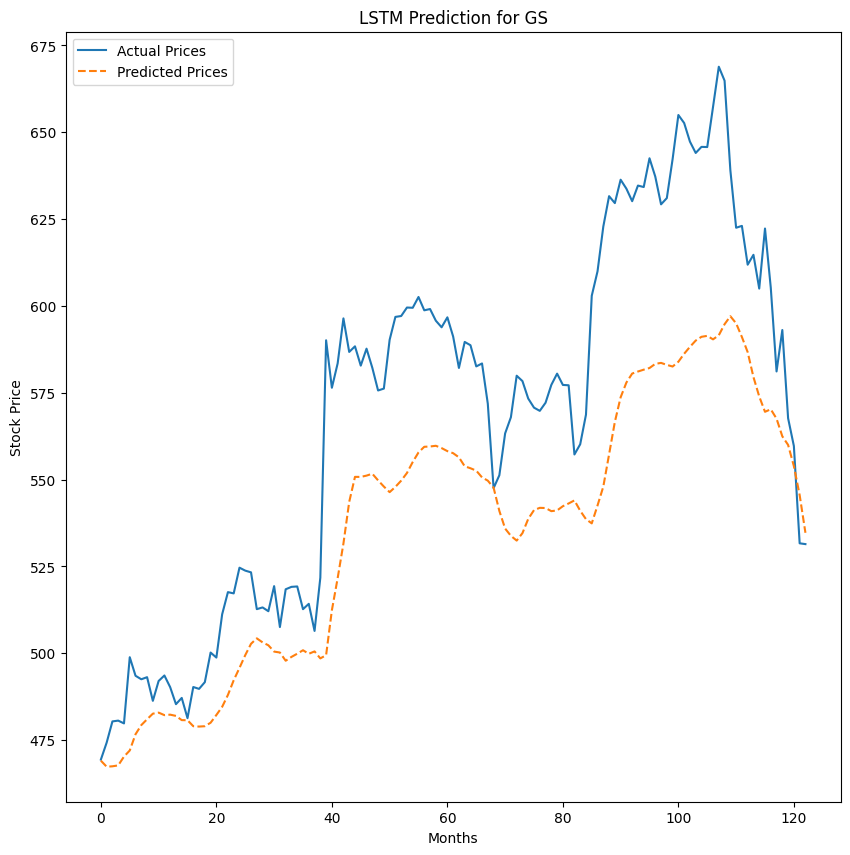

In [3]:


# Load stock data
ticker = "GS"  # Goldman Sachs example
stock = yf.Ticker(ticker)
df = stock.history(period="1y")  # Fetch last 1 year of data to reduce memory usage

# Use the closing price for prediction
df = df[['Close']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Prepare the dataset for LSTM
def prepare_data(data, look_back=5):  # Reduce look_back to lower memory usage
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

look_back = 5  # Use fewer days to reduce dataset size
X, y = prepare_data(df_scaled, look_back)

# Split data into training and test sets



train_size = int(len(X) * 0.5)  # Reduce training size to 50%
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Build LSTM model with fewer units to optimize memory
model = Sequential([
    LSTM(units=10, return_sequences=False, input_shape=(look_back, 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with fewer epochs and a smaller batch size
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10,10))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', linestyle='dashed')
plt.legend()
plt.title(f"LSTM Prediction for {ticker}")
plt.xlabel("Months")
plt.ylabel("Stock Price")
plt.show()




Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0831 - val_loss: 0.5864
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0534 - val_loss: 0.4899
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0463 - val_loss: 0.4036
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0296 - val_loss: 0.3310
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0199 - val_loss: 0.2701
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0140 - val_loss: 0.2205
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0088 - val_loss: 0.1834
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0071 - val_loss: 0.1583
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0065 - val_loss: 0.1432
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0069 - val_loss: 0.1349
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0066 - val_loss: 0.1337
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0065 - val_loss: 0.1324
Epoch 13/20


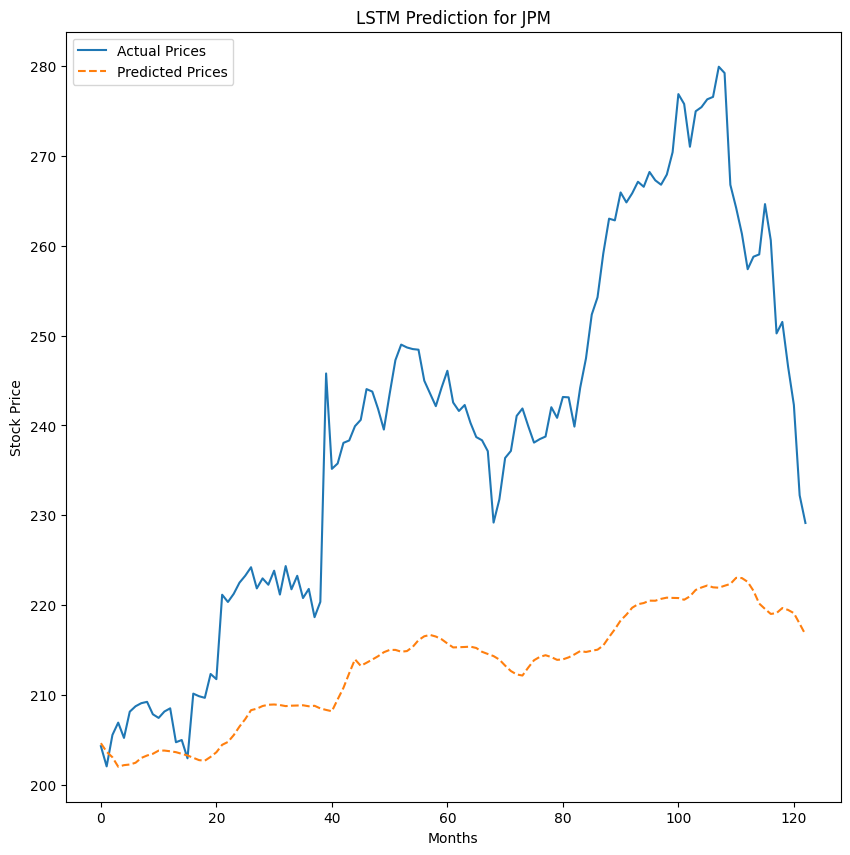

In [4]:
# Load stock data
ticker = "JPM"
stock = yf.Ticker(ticker)
df = stock.history(period="1y")  # Fetch last 1 year of data to reduce memory usage

# Use the closing price for prediction
df = df[['Close']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Prepare the dataset for LSTM
def prepare_data(data, look_back=5):  # Reduce look_back to lower memory usage
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

look_back = 5  # Use fewer days to reduce dataset size
X, y = prepare_data(df_scaled, look_back)

# Split data into training and test sets


train_size = int(len(X) * 0.5)  # Reduce training size to 50%
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Build LSTM model with fewer units to optimize memory
model = Sequential([
    LSTM(units=10, return_sequences= False, input_shape=(look_back, 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with fewer epochs and a smaller batch size
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10,10))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', linestyle='dashed')
plt.legend()
plt.title(f"LSTM Prediction for {ticker}")
plt.xlabel("Months")
plt.ylabel("Stock Price")
plt.show()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0315 - val_loss: 0.3352
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0226 - val_loss: 0.2720
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0140 - val_loss: 0.2160
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089 - val_loss: 0.1671
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0046 - val_loss: 0.1299
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032 - val_loss: 0.1067
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0028 - val_loss: 0.0959
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - val_loss: 0.0962
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0035 - val_loss: 0.0976
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0034 - val_loss: 0.0978
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0024 - val_loss: 0.0957
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0027 - val_loss: 0.0887
Epoch 13/20


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


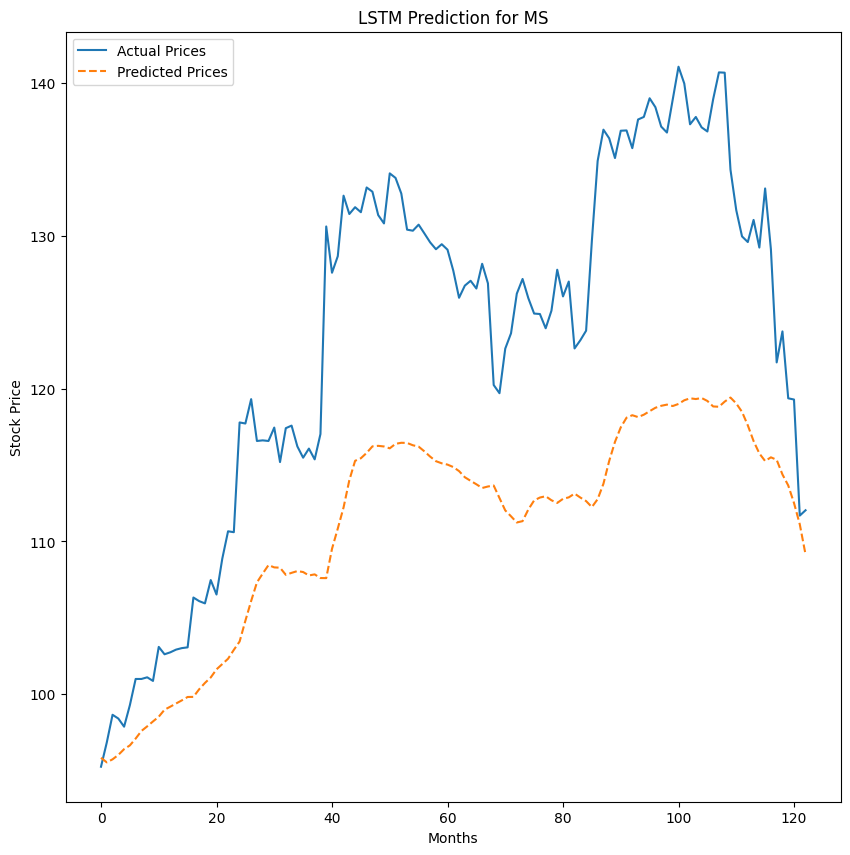

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load stock data
ticker = "MS"
stock = yf.Ticker(ticker)
df = stock.history(period="1y")  # Fetch last 1 year of data to reduce memory usage

# Use the closing price for prediction
df = df[['Close']]

# Scale the data
scaler = MinMaxScaler (feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Prepare the dataset for LSTM
def prepare_data(data, look_back=5):  # Reduce look_back to lower memory usage
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

look_back = 5  # Use fewer days to reduce dataset size
X, y = prepare_data(df_scaled, look_back)

# Split data into training and test sets


train_size = int(len(X) * 0.5)  # Reduce training size to 50%
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Build LSTM model with fewer units to optimize memory
model = Sequential([
    LSTM(units=10, return_sequences= False, input_shape=(look_back, 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with fewer epochs and a smaller batch size
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10,10))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', linestyle='dashed')
plt.legend()
plt.title(f"LSTM Prediction for {ticker}")
plt.xlabel("Months")
plt.ylabel("Stock Price")
plt.show()